In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [50]:
# create a dataframe to store results
results = pd.DataFrame()
# use a for loop to read all csv files
inputs = pd.read_csv('exp_noise_doe_experiments_input.csv', index_col=0)

In [54]:
# read the outpout
outputs = pd.read_csv('exp_noise_doe_experiments_output.csv', index_col=0)
outputs

,normalized_mae,normalized_rmse,r2,mean_log_likelihood,lf_training_time,hf_training_time,inference_time,learned_noise_std
0,0.6325369992219878,0.0704778132172406,0.9879754592410978,-6.669054607521011,4.927242994308472,0.434213638305664,0.0327332019805908,0.0001642384498717
1,0.6889402047230248,0.0790605433206779,0.9848684559222604,-10.943850253753606,3.945974349975586,0.4722871780395508,0.0319058895111084,0.0001655399510164
2,0.7589736810686118,0.0925479626155117,0.9792653178125688,-15.20943508097954,2.801843643188477,0.4378855228424072,0.0297687053680419,0.0001668652997589
3,0.3705100411444609,0.045524997928495,0.9949827755787716,-0.98430504959361,4.353226900100708,1.089200735092163,0.0368270874023437,0.4433115463602712
4,0.4186445632472251,0.0520296403342304,0.9934466206908164,-1.2267657047935716,2.906897783279419,0.9236433506011964,0.0277087688446044,0.4469631588513548
...,...,...,...,...,...,...,...,...
25199,0.4330789615691654,0.07416009237500336,0.9970640229484355,-1.210578592911449,15.344704389572144,1.4641575813293457,0.023243427276611328,0.7292870807484766
8462,1.5894544124603271,0.02545022964477539,0.898631136626642,NaN,NaN,NaN,NaN,NaN
25197,0.3259491335192095,0.05234547508112073,0.9985372489315456,-0.680789059116079,17.084702253341675,1.7033569812774658,0.024346113204956055,0.4292292896884385
25198,0.346568071348595,0.05846015386065633,0.9981755496859217,-0.9095487748398232,19.39703106880188,1.9762167930603027,0.028963088989257812,0.5396996968281993


In [55]:
outputs["normalized_mae"].values

array(['0.6325369992219878', '0.6889402047230248', '0.7589736810686118',
       ..., '0.3259491335192095', '0.346568071348595',
       '0.4330789615691654'], dtype=object)

In [34]:
# get a subset of the data with method = 'cokriging', "hk","scaled_kriging", "mf_rbf_gpr"
mf_rbf_gpr_results = results[results['method'] == 'mf_rbf_gpr']
#
cokriging_results = results[results['method'] == 'cokriging']
hk_results = results[results['method'] == 'hk']
scaled_kriging_results = results[results['method']
                                 == 'scaled_kriging']

In [36]:
mf_rbf_gpr_results

,method,noise_std,num_hf,num_lf,problem,seed,normalized_mae,normalized_rmse,r2,mean_log_likelihood,lf_training_time,hf_training_time,inference_time,learned_noise_std
6300,mf_rbf_gpr,0.1,5,50,mf_Bohachevsky,1,0.651711990076684,0.0724088704206301,0.9873074990910412,-7.9942925430018,1.552154541015625,0.2517950534820556,0.0131053924560546,0.0001642384498717
6301,mf_rbf_gpr,0.3,5,50,mf_Bohachevsky,1,0.7150878097091248,0.0832475713143623,0.9832232898081688,-12.988234203537123,2.7003324031829834,0.2992715835571289,0.0209443569183349,0.0001655399510164
6302,mf_rbf_gpr,0.5,5,50,mf_Bohachevsky,1,0.8105752532934778,0.0991275779492288,0.9762122893094868,-17.86749475833575,1.958052396774292,0.2767388820648193,0.0128624439239501,0.0001668652997589
6303,mf_rbf_gpr,0.1,10,50,mf_Bohachevsky,1,0.4151114142032722,0.0420859216193001,0.9957121721361206,-0.9293998594365028,2.304386138916016,0.7472350597381592,0.017747163772583,0.4191715469737031
6304,mf_rbf_gpr,0.3,10,50,mf_Bohachevsky,1,0.4412439065426305,0.0469426226033345,0.9946654430416232,-1.1725694565310096,1.3111984729766846,0.5167338848114014,0.0135505199432373,0.4394537678071478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12595,mf_rbf_gpr,0.3,25,200,mf_Sixhump,5,0.7792829071096204,0.07878074360187694,0.9966867646680521,-1.157726072033368,9.936210870742798,2.1215527057647705,0.02674078941345215,0.18901445317413296
12596,mf_rbf_gpr,0.5,25,200,mf_Sixhump,5,1.263775327177662,0.12616617803447414,0.9915023659020777,-1.3897710012967406,6.271223306655884,1.4235138893127441,0.02189469337463379,0.42257885829583836
12597,mf_rbf_gpr,0.1,30,200,mf_Sixhump,5,0.3445925543206392,0.029563760726931947,0.9995334142296193,0.1730814864198991,10.475646018981934,2.600567579269409,0.02809739112854004,0.16137221354193876
12598,mf_rbf_gpr,0.3,30,200,mf_Sixhump,5,0.642853658715482,0.06871028303513772,0.9974796804542336,-0.9160585346063719,5.136363983154297,1.4806954860687256,0.023035287857055664,0.5570133191626431


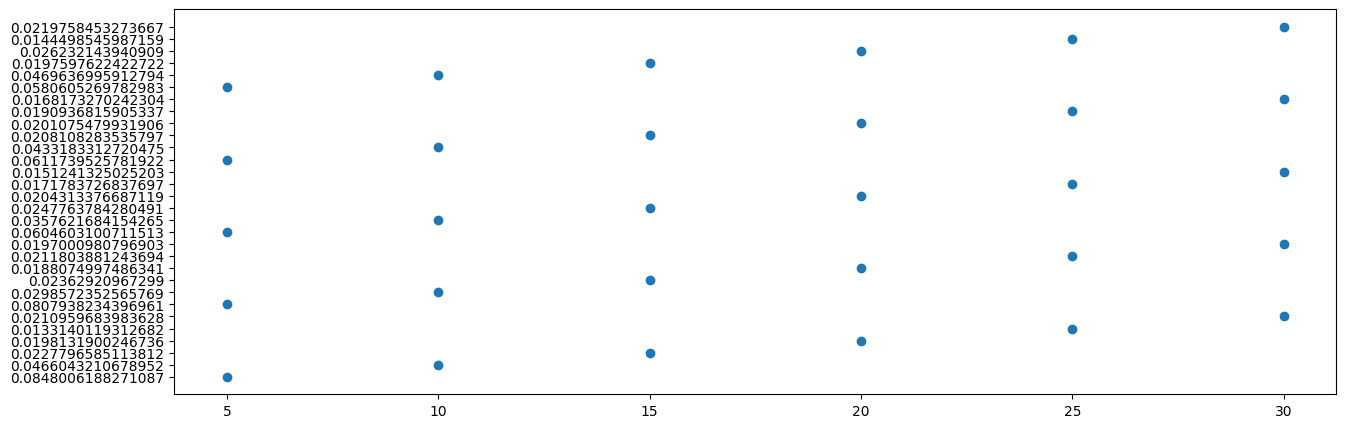

In [37]:
# plot the results by normalized_mae vs number of evaluations
problem = 'mf_Bohachevsky'
num_lf = 200
# select the subset of the data with problem = 'mf_Bohachevsky' and num_lf = 100
new_results = mf_rbf_gpr_results[(mf_rbf_gpr_results['problem'] == problem) & (
    mf_rbf_gpr_results['num_lf'] == num_lf) & (mf_rbf_gpr_results['noise_std'] == 0.1)]

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(new_results['num_hf'].values, new_results['normalized_rmse'].values,
        label='mf_rbf_gpr', marker='o', linestyle='none')

In [39]:
new_results['normalized_rmse'].values

array(['0.0848006188271087', '0.0466043210678952', '0.0227796585113812',
       '0.0198131900246736', '0.0133140119312682', '0.0210959683983628',
       '0.0807938234396961', '0.0298572352565769', '0.02362920967299',
       '0.0188074997486341', '0.0211803881243694', '0.0197000980796903',
       '0.0604603100711513', '0.0357621684154265', '0.0247763784280491',
       '0.0204313376687119', '0.0171783726837697', '0.0151241325025203',
       '0.0611739525781922', '0.0433183312720475', '0.0208108283535797',
       '0.0201075479931906', '0.0190936815905337', '0.0168173270242304',
       '0.0580605269782983', '0.0469636995912794', '0.0197597622422722',
       '0.026232143940909', '0.0144498545987159', '0.0219758453273667'],
      dtype=object)

In [15]:
new_results['num_hf']

6408     5
6411    10
6414    15
6417    20
6420    25
6423    30
6534     5
6537    10
6540    15
6543    20
6546    25
6549    30
6660     5
6663    10
6666    15
6669    20
6672    25
6675    30
6786     5
6789    10
6792    15
6795    20
6798    25
6801    30
6912     5
6915    10
6918    15
6921    20
6924    25
6927    30
Name: num_hf, dtype: int64

In [31]:
new_results["normalized_rmse"].values

'0.0219758453273667'

In [ ]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = "tab:blue"
ax1.set_xlabel("Number of evaluations")
ax1.set_ylabel("Normalized RMSE", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    palette="colorblind",
    marker="^",
    legend="full",
    linewidth=2,
    y="mf_normalized_rmse",
    hue="noise_std",
    ax=ax1,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_normalized_rmse",
    ax=ax1,
)
ax1.tick_params(axis="y", labelcolor=color)

ax1.get_legend().remove()

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Log Likelihood", color=color)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="^",
    legend="full",
    y="mf_mean_log_likelihood",
    ax=ax2,
)
sns.lineplot(
    data=mf_rbf_gpr_results,
    x="num_hf",
    hue="noise_std",
    palette="colorblind",
    marker="s",
    legend="full",
    linestyle="dashed",
    y="sf_mean_log_likelihood",
    ax=ax2,
)
ax2.tick_params(axis="y", labelcolor=color)
ax2.get_legend().remove()
# set the legend scale of the right y-axis into log scale
# ax2.set_yscale('log')

# add legend

plt.show()

In [ ]:
# problem information
problem_sets = [
    "Bohachevsky",
    "Booth",
    "Borehole",
    "CurrinExp",
    "Hartman3",
    "Hartman6",
    "Park91A",
    "Park91B",
    "Sixhump",
]
dimensions = [2, 2, 8, 2, 3, 6, 4, 4, 2]
r2 = [0.857, 0.925, 1.000, 0.997, -0.196, 0.712, 0.994, 1.0000, 0.833]

# # set r2 to have 3 decimal places
# r2 = [round(i, 3) for i in r2]
# print(r2)

In [ ]:
problem_set = mf_rbf_gpr_results["problem"].unique()

font_size = 14
fig, ax = plt.subplots(3, 3, figsize=(16, 9))
# for problem in problem_set:

for ii in range(3):
    for jj in range(3):
        problem = problem_set[ii * 3 + jj]
        result = mf_rbf_gpr_results[(mf_rbf_gpr_results["problem"] == problem)]
        # Plot normalized RMSE on the left y-axis
        color = "tab:blue"
        if ii == 2:
            ax[ii, jj].set_xlabel(
                "number of HF samples (d)", fontsize=font_size)
        else:
            ax[ii, jj].set_xlabel(" ")
        if jj == 0:
            ax[ii, jj].set_ylabel("NRMSE", color=color)
        else:
            ax[ii, jj].set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_normalized_rmse",
            hue="noise_std",
            ax=ax[ii, jj],
            err_style="bars",
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linewidth=2,
            linestyle="dashed",
            y="sf_normalized_rmse",
            ax=ax[ii, jj],
            err_style="bars",
        )
        ax[ii, jj].tick_params(axis="y", labelcolor=color)
        ax[ii, jj].get_legend().remove()
        # Create another y-axis for log likelihood
        ax2 = ax[ii, jj].twinx()
        color = "tab:red"
        if jj == 2:
            ax2.set_ylabel("Log Likelihood", color=color, fontsize=font_size)
        else:
            ax2.set_ylabel(" ", color=color)
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="^",
            legend="full",
            linewidth=2,
            y="mf_mean_log_likelihood",
            err_style="bars",
            ax=ax2,
        )
        sns.lineplot(
            data=result,
            x="num_hf",
            hue="noise_std",
            palette="colorblind",
            marker="s",
            legend="full",
            linestyle="dashed",
            linewidth=2,
            err_style="bars",
            y="sf_mean_log_likelihood",
            ax=ax2,
        )
        ax2.tick_params(axis="y", labelcolor=color)
        # remove the legend of ax2
        if ii == 2 and jj == 2:
            ax2.legend(fontsize=12)
        else:
            ax2.get_legend().remove()

        # set the font of axis and y-axis precision
        ax[ii, jj].tick_params(axis="both", which="major", labelsize=font_size)
        ax2.tick_params(axis="both", which="major", labelsize=font_size)
        # set the line width of the axis
        for axis in ["top", "bottom", "left", "right"]:
            ax[ii, jj].spines[axis].set_linewidth(1.5)
        ax2.spines["right"].set_linewidth(1.5)
        # get title info
        title = (
            problem_sets[ii * 3 + jj]
            + " (d="
            + str(dimensions[ii * 3 + jj])
            + ", r="
            + str(r2[ii * 3 + jj])
            + ")"
        )
        ax[ii, jj].set_title(title)
        # set space between subplots
        plt.subplots_adjust(wspace=0.3, hspace=0.25)
plt.savefig("gpr_comparison_at_200lf_samples.png",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.pdf",
            dpi=300, bbox_inches="tight")
plt.savefig("gpr_comparison_at_200lf_samples.svg",
            dpi=300, bbox_inches="tight")
plt.show()